# Factors for film Production Success

## 1. Business Understanding

### a) Introduction
Film production has become one of the best ways to cultivate an image of a product and create a little world of fantasies for the viewers. Many companies are investing in this and the growth of the companies has triggered the interest of other companies to invest in it too. 

This project is to use data collected from different movie platforms to determine the factor of success in film production. 

### b) Problem of the Statement
For a better insight into investing, traditional methods to make decisions cannot be reliable. The use of a data-driven decision is more reliable. Before starting to invest in film production, getting a clear understanding of the factors to consider for the success of the same is important.

It is important to have this understanding not only to get better returns but to also remain relevant to the community and the target audience. Relevance is the best market strategy that increases the studio's gross income. Therefore better and clear decisions are to be made before investing.

### c) Main Objective
To determine the factors that lead to film production success.

### d) Specific Objective
* Data for determining the relationship between the audience rating and genre and the movie runtime.
* Determine the relationship between movie budget production and its domestic and worldwide gross.
* Determine the best-performing studio in terms of domestic and foreign gross.
* Determine the Age rating of the film and its value in Box office.

### e) Experimental Design
1. Data Collection
2. Read and Check data
3. Cleaning the Data
4. Exploratory Data Analysis
5. Conclusions and Recommendations

### f) Data Understanding
The data to be used was provided by the instituion.
The datasets to be used are:
1. IMDB title rating: It has the movie ID'S(tconst) with avaragerating of each and the numvotes.
2. IMDB title basics: It contains the movie genre and the tconst with the movie runtime.
3. BOM movie gross: contains stuio with their respective domestic and foreign gross.
4. Rotten Tomatoes Movie info: Contains movie genre, box office and genre.
5. Rotten Tomatoes Reviews info: Contains the rating and fresh data.

## 2. Importing Libraries

In [1]:
# Importing libraries to be used
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## 3. Reading, cleanig and exploring Data
All data needed through the process.

## a. Data for determining the relationship between the audience rating and genre and the movie runtime
For this objective we will use the imdb title rating and imdb title basics datasets. The two datasets will be joined using the *tconst* which is a unique id for the movies. 

The dataset will then be cleaned and remain with relevant columns with no duplicates and no null values. And will use the number votes as the number of people that watched.From that will find that was most watched genre.

##### Upload the title rating dataset and inspect it

In [2]:
#Uploading the title rating dataset
movie_rating = pd.read_csv('data/imdb.title.ratings.csv')
movie_rating.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [3]:
# Whats the shape of the dataset
movie_rating.shape

(73856, 3)

In [4]:
# Check the data types of column and missing values
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [5]:
# Check any duplicates in the dataset
movie_rating.duplicated().sum()

0

The title rating dataset is clean with no duplicates, no missng values and all datatypes are relvant to each column as expected

##### Upload the title basics dataset and inspect it

In [6]:
# Upload the imdb title basics
movie_basics = pd.read_csv('data/imdb.title.basics.csv')
movie_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
#Check the shape
movie_basics.shape

(146144, 6)

In [8]:
#Check the data types of the columns
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [9]:
#Check for duplicates
movie_basics.duplicated().sum()

0

##### Do an inner join of the two datasets

In [10]:
#Do an inner join using merge on the tconst
movie_rating_basics = movie_rating.merge(movie_basics, on='tconst')
movie_rating_basics.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [11]:
# Inspecting the new dataset
movie_rating_basics.shape

(73856, 8)

In [12]:
# Datatypes
movie_rating_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


The dataypes are as ecpected the int, float and objects where needed

In [13]:
#Missing values and its percentage in the dataset
movie_rating_basics.isna().mean()*100

tconst              0.000000
averagerating       0.000000
numvotes            0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
dtype: float64

In [14]:
# Drop all columns with null values
movie_rating_basics.dropna(inplace=True) #Drop and apply on the dataset

In [15]:
#the number of rows have dropped compared to the original dataset
movie_rating_basics

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73849,tt9768966,8.6,27,Plugged in,Plugged in,2019,53.0,Documentary
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [16]:
#Check if it has no missing values
movie_rating_basics.isna().sum()

tconst             0
averagerating      0
numvotes           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

The data is clean.
###### Drop irrelevant columns to remain with relevant columns i.e genres, runtime_minutes, averagerating, num_votes and year

In [17]:
movie_rating_basics = movie_rating_basics.drop(labels = ['tconst','primary_title', 'original_title'],
                                               axis=1)
movie_rating_basics

,averagerating,numvotes,start_year,runtime_minutes,genres
0,8.3,31,2019,117.0,Romance
1,8.9,559,2019,87.0,Documentary
2,6.4,20,2010,90.0,Drama
3,4.2,50352,2014,99.0,"Action,Adventure,Fantasy"
4,6.5,21,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...
73849,8.6,27,2019,53.0,Documentary
73851,8.1,25,2018,84.0,Documentary
73852,7.5,24,2018,120.0,"Action,Animation,Sci-Fi"
73854,7.0,5,2019,81.0,Documentary


#### Explore the dataset
- Will use the number of votes as the estimate number of people who viewed and shared the rating to the movie(genre). Slice the dataset to have details of movies with or more than 100000

In [18]:
movie_rating_basics_slice = movie_rating_basics[movie_rating_basics['numvotes'] >= 100000]

In [19]:
movie_rating_basics_slice

,averagerating,numvotes,start_year,runtime_minutes,genres
16,7.6,326657,2011,133.0,"Biography,Drama,Sport"
19,7.4,428142,2011,132.0,"Action,Adventure,Thriller"
20,7.2,477771,2012,109.0,"Action,Comedy,Crime"
59,7.1,129443,2010,113.0,"Drama,Romance"
89,6.9,398695,2011,98.0,"Comedy,Crime"
...,...,...,...,...,...
72563,4.1,137734,2010,103.0,"Action,Adventure,Family"
72569,6.3,129663,2010,113.0,"Adventure,Family,Fantasy"
72597,7.6,175968,2011,101.0,"Action,Thriller"
72913,6.1,156432,2014,126.0,"Action,Adventure,Thriller"


In [20]:
movie_rating_basics_slice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 618 entries, 16 to 73118
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   averagerating    618 non-null    float64
 1   numvotes         618 non-null    int64  
 2   start_year       618 non-null    int64  
 3   runtime_minutes  618 non-null    float64
 4   genres           618 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 29.0+ KB


###### Inspet each column to check any unique trait

In [21]:
# Describe the dataset
movie_rating_basics_slice.describe()

,averagerating,numvotes,start_year,runtime_minutes
count,618.000000,6.180000e+02,618.000000,618.000000
mean,6.955340,2.621874e+05,2013.555016,116.592233
std,0.773013,1.915327e+05,2.413035,17.709031
min,4.100000,1.003180e+05,2010.000000,80.000000
25%,6.400000,1.359272e+05,2011.250000,104.000000
50%,7.000000,1.980145e+05,2013.000000,115.000000
75%,7.500000,3.258420e+05,2016.000000,128.000000
max,9.300000,1.841066e+06,2019.000000,181.000000


In [22]:
#Inspect the start_year
#To check the unique years
movie_rating_basics_slice['start_year'].value_counts()

start_year
2013    94
2011    83
2014    81
2012    73
2010    72
2016    69
2015    58
2017    51
2018    32
2019     5
Name: count, dtype: int64

#### Number of votes with genre
Using a bargraph to see the distibution of the genre with high num of votes 

In [23]:
movie_rating_basics_slice.head()

,averagerating,numvotes,start_year,runtime_minutes,genres
16,7.6,326657,2011,133.0,"Biography,Drama,Sport"
19,7.4,428142,2011,132.0,"Action,Adventure,Thriller"
20,7.2,477771,2012,109.0,"Action,Comedy,Crime"
59,7.1,129443,2010,113.0,"Drama,Romance"
89,6.9,398695,2011,98.0,"Comedy,Crime"


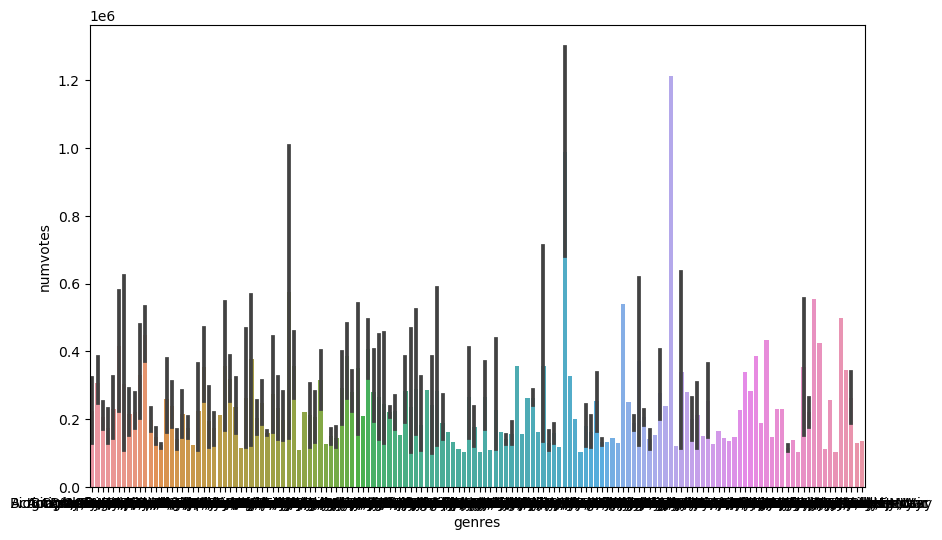

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'genres', y = 'numvotes', data=movie_rating_basics_slice);

In [25]:
movie_rating_basics_slice['genres'].value_counts()

genres
Action,Adventure,Sci-Fi       50
Action,Adventure,Fantasy      28
Adventure,Animation,Comedy    22
Action,Adventure,Comedy       18
Action,Comedy,Crime           17
                              ..
Adventure,Mystery,Sci-Fi       1
Drama,Music,Romance            1
Comedy,Sci-Fi                  1
Family,Fantasy,Musical         1
Drama,History,War              1
Name: count, Length: 146, dtype: int64

#### Slice the dataset further
It is hard to determine which genre is best because the genre column has 146 unique inputs. Will slice the genre column and get the dataset with the top 10 most counted genre and compare them with the number of votes.

In [26]:
#Get the top 10 genre and values
#Get the top genre and put it in a list
top_10_genre = movie_rating_basics_slice['genres'].value_counts().index[:10].tolist()

#Get the values of the(the count) of the respective genre
top_10_genre_appearances = movie_rating_basics_slice['genres'].value_counts().values[:10].tolist()


#Print them out
print("The top genre are: \n", top_10_genre)
print("The top genre appreances are: \n", top_10_genre_appearances)

The top genre are: 
 ['Action,Adventure,Sci-Fi', 'Action,Adventure,Fantasy', 'Adventure,Animation,Comedy', 'Action,Adventure,Comedy', 'Action,Comedy,Crime', 'Comedy,Drama,Romance', 'Action,Crime,Thriller', 'Action,Adventure,Drama', 'Drama', 'Comedy']
The top genre appreances are: 
 [50, 28, 22, 18, 17, 16, 16, 16, 15, 14]


In [27]:
#Create a new dataset with the top 10 genre only
top_movie_genre = movie_rating_basics_slice.loc[movie_rating_basics_slice['genres'].isin(top_10_genre)]
top_movie_genre

,averagerating,numvotes,start_year,runtime_minutes,genres
20,7.2,477771,2012,109.0,"Action,Comedy,Crime"
228,7.1,133887,2013,95.0,"Comedy,Drama,Romance"
330,6.7,167680,2010,112.0,"Comedy,Drama,Romance"
339,6.6,182320,2010,105.0,"Action,Crime,Thriller"
760,7.0,657690,2010,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...
71537,6.3,110824,2011,101.0,"Action,Adventure,Comedy"
71702,4.8,181687,2013,100.0,"Action,Adventure,Drama"
71879,8.5,670926,2018,149.0,"Action,Adventure,Sci-Fi"
71946,7.5,290053,2017,122.0,"Action,Crime,Thriller"


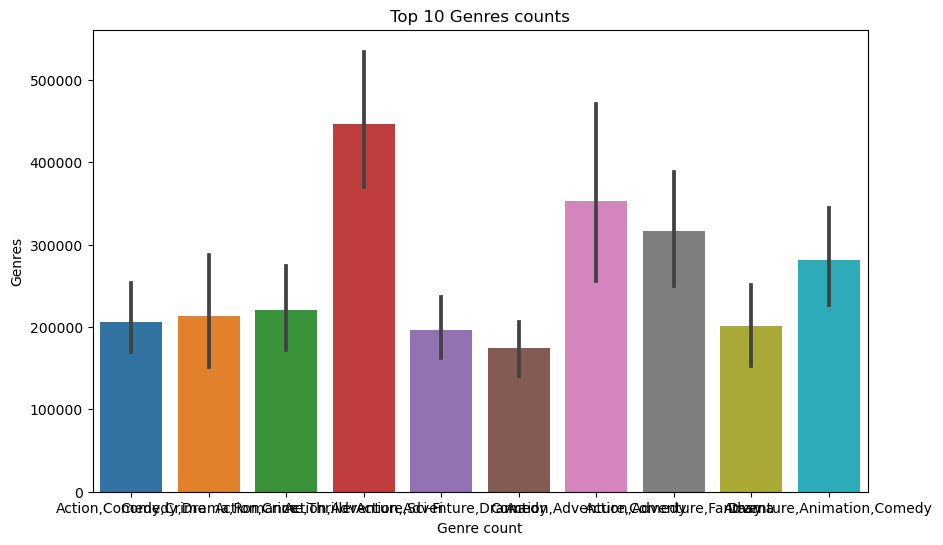

In [28]:
#Plot bar graph of the same
plt.figure(figsize=(10,6))
sns.barplot(x = 'genres', y = 'numvotes', data=top_movie_genre)
plt.title("Top 10 Genres counts")
plt.xlabel('Genre count')
plt.ylabel('Genres');

#### Grouping the new dataset to get a better understanding
Group the top_movie_genre using genre to only have the top 10 genre and find the mean of the grouped number of votes

In [29]:
grp_top = top_movie_genre.groupby('genres')['numvotes'].mean().reset_index()
grp_top

,genres,numvotes
0,"Action,Adventure,Comedy",352660.222222
1,"Action,Adventure,Drama",196656.000000
2,"Action,Adventure,Fantasy",316940.571429
3,"Action,Adventure,Sci-Fi",446764.040000
4,"Action,Comedy,Crime",206703.294118
5,"Action,Crime,Thriller",221058.062500
6,"Adventure,Animation,Comedy",280868.000000
7,Comedy,174131.285714
8,"Comedy,Drama,Romance",213493.062500
9,Drama,201626.466667


#### Visualize the grouped dataset

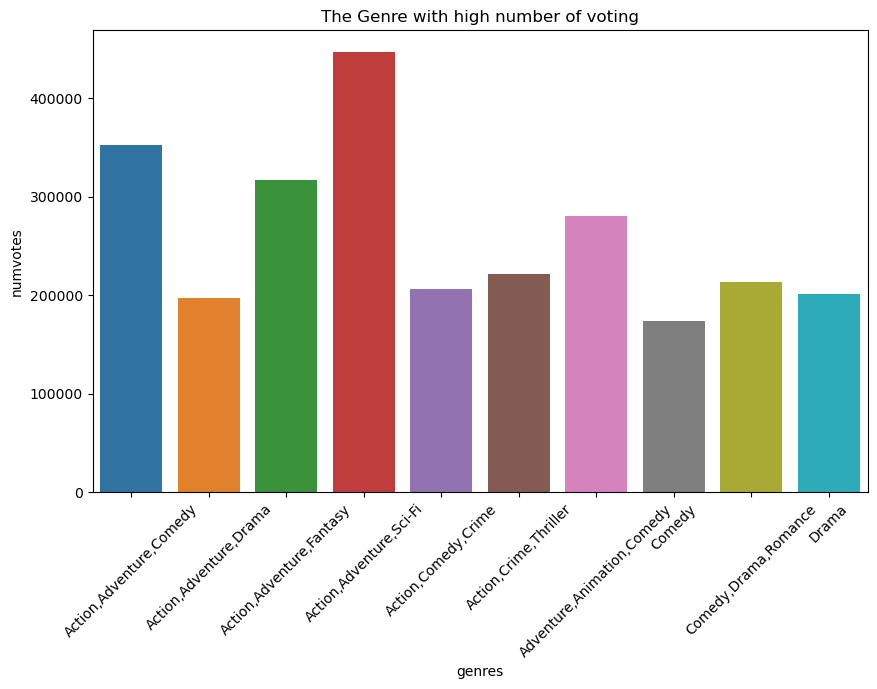

In [30]:
# Drawing the bar plot
plt.figure(figsize=(10,6))
sns.barplot(x = 'genres', y = 'numvotes', data=grp_top)
plt.title("The Genre with high number of voting")
plt.xticks(rotation=45);

#### Top movies with the runtime
The mean of the runtime for the top 10 genre

In [31]:
grp_top = top_movie_genre.groupby('genres')['runtime_minutes'].mean().reset_index()
grp_top.describe()

,runtime_minutes
count,10.000000
mean,115.258157
std,10.380491
min,98.363636
25%,107.921875
50%,118.954861
75%,120.371429
max,132.060000


### Finding
- Film with the Action, Adventure and fantacy are most watched and get most of the reactions. 
- From the top movies dataset the data mean runtime is 116minutes

## b. Determine the relationship between movie budget production and its domestic and worldwide gross
The movie budget dataset will be of the essence to understanding any relationship between the production budget, domestic and worldwide gross.

To understand the data;
**"Domestic"** refers to gross box-office revenue from North America (U.S., Canada, and Puerto Rico) unless otherwise noted.
**"International/worldwide gross"** covers the rest of the world.

###### Upload the tn movie budget dataset

In [32]:
#upload data
budget = pd.read_csv('data/tn.movie_budgets.csv')
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


###### Inspect the dataset

In [33]:
# Find the shape
budget.shape

(5782, 6)

In [34]:
# The column info
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [35]:
#CHeck for duplicates
budget.duplicated().sum()

0

In [36]:
#Check any duplicates in movie column
budget['movie'].duplicated().sum()

84

In [37]:
#drop the duplicates
budget.drop_duplicates(subset=['movie'], inplace=True)

In [38]:
#CHeck for duplicates
budget.duplicated().sum()

0

No missing values but has wrong data types for the budget and gross column. 
Has no duplicates

#### Cleaning the dataset

Remove dollar signs and commas then convert to an interger.

In [39]:
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [40]:
#Select the columns to be stripped and replaced
clean_column = ['production_budget','domestic_gross','worldwide_gross']

#Use the lambda function to remove the $and the comma
budget[clean_column] = budget[clean_column].apply(lambda x: x.str.replace('$','').str.replace(',',''))
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [41]:
#COnverting the columns to intergers
budget[clean_column] = budget[clean_column].astype(int)
budget.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5698 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5698 non-null   int64 
 1   release_date       5698 non-null   object
 2   movie              5698 non-null   object
 3   production_budget  5698 non-null   int64 
 4   domestic_gross     5698 non-null   int64 
 5   worldwide_gross    5698 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 311.6+ KB


In [42]:
# Removing the dates and month to remain with years alone
# split where the , starts and access the first then strip any value/whitespaces after the date
budget['release_date'] = budget['release_date'].str.split(',').str[1].str.strip() 
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425000000,760507625,2776345279
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019,Dark Phoenix,350000000,42762350,149762350
3,4,2015,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [43]:
# Sort the dataset in order of the highest domestic gross
top_budget = budget.sort_values(by='domestic_gross', ascending=False)
top_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5,6,2015,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
0,1,2009,Avatar,425000000,760507625,2776345279
41,42,2018,Black Panther,200000000,700059566,1348258224
6,7,2018,Avengers: Infinity War,300000000,678815482,2048134200
42,43,1997,Titanic,200000000,659363944,2208208395
...,...,...,...,...,...,...
3849,50,2017,Posledniy bogatyr,8500000,0,30700192
3827,28,2004,The I Inside,8800000,0,0
3825,26,2011,Ultramarines,8900000,0,0
3822,23,2013,A Haunting in Connecticut 2: The Ghosts of Geo...,9000000,0,0


In [44]:
top_budget['domestic_gross'].max()

936662225

##### Visualize the data
Will use scatter plots to find any relationship between the production, domestic and worlwide

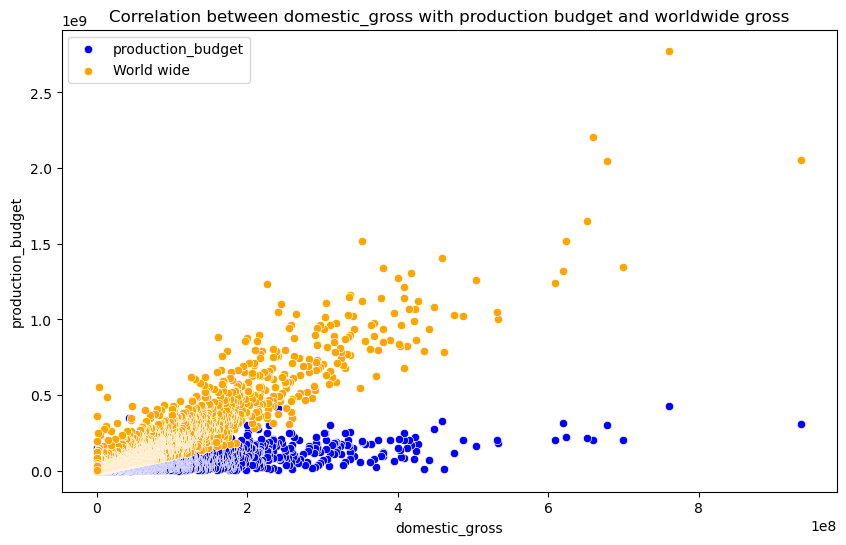

In [45]:
#Draw a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='domestic_gross', y='production_budget', data=top_budget, color ='blue', label='production_budget')
sns.scatterplot(x='domestic_gross', y='worldwide_gross', data= top_budget, color='orange', label='World wide')
plt.title("Correlation between domestic_gross with production budget and worldwide gross");

It's hard to determine any relationship we will split the dataset to two depending on the production budget;
- Top 10 spenders
- Last 10 spenders

In [46]:
top_spenders = top_budget[:100]
# top_spenders

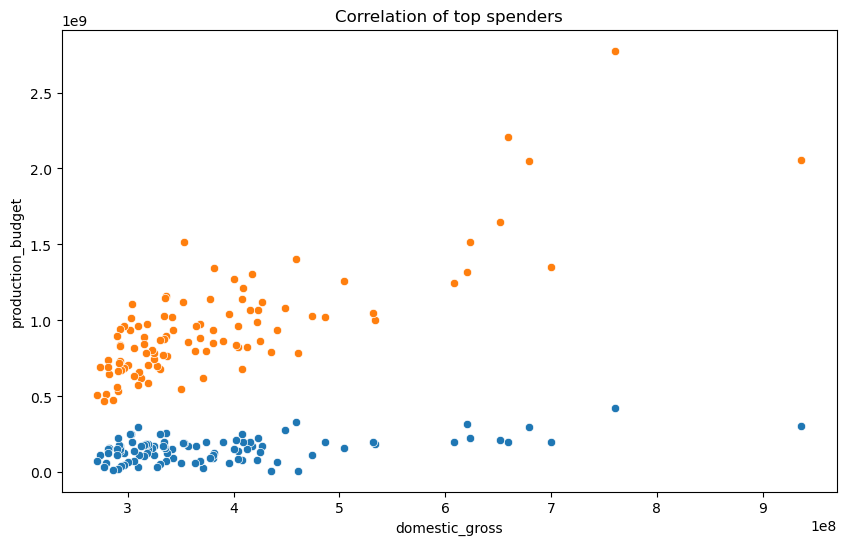

In [47]:
#Draw scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x='domestic_gross', y='production_budget', data = top_spenders)
sns.scatterplot(x='domestic_gross', y = 'worldwide_gross', data= top_spenders)
plt.title('Correlation of top spenders');

#### Use correlation matrix and heat map to visualize
Correlation matrix will show how strong or how weak the three related and affect each other.
Heat-map has better color gradient to show the relationship of large datasets

In [48]:
correlation_matrix = top_budget[['production_budget', 'domestic_gross', 'worldwide_gross']].corr()
correlation_matrix

,production_budget,domestic_gross,worldwide_gross
production_budget,1.000000,0.689317,0.749787
domestic_gross,0.689317,1.000000,0.939370
worldwide_gross,0.749787,0.939370,1.000000


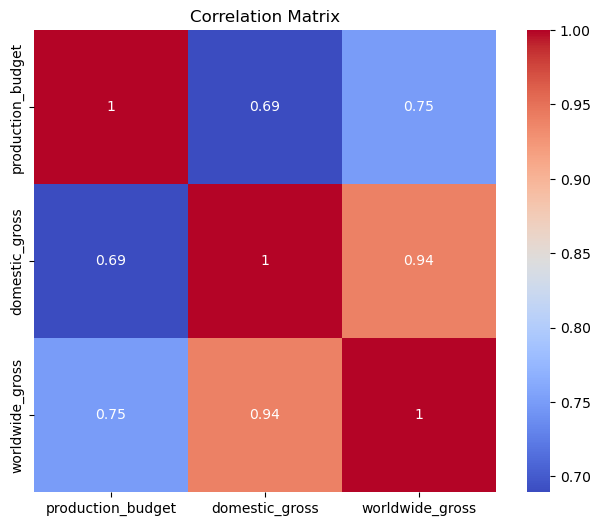

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

- The correlation between the production budget and the domestic gross is 0.69 which is not that strong correlation or great impact but a higher impact on the worldwide gross.
- There is a *a very high* correlation of 0.94 between the domestic gross and worldwide gross. The success of the movie in the domestic implies a great impact on the success worldwide.

#### Any trend with the years and the production budget

In [50]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5698 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5698 non-null   int64 
 1   release_date       5698 non-null   object
 2   movie              5698 non-null   object
 3   production_budget  5698 non-null   int64 
 4   domestic_gross     5698 non-null   int64 
 5   worldwide_gross    5698 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 311.6+ KB


In [51]:
#Convert the year to datetime
budget['release_date'] = pd.to_datetime(budget['release_date'])
budget.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5698 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5698 non-null   int64         
 1   release_date       5698 non-null   datetime64[ns]
 2   movie              5698 non-null   object        
 3   production_budget  5698 non-null   int64         
 4   domestic_gross     5698 non-null   int64         
 5   worldwide_gross    5698 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 311.6+ KB


In [52]:
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-01-01,Avatar,425000000,760507625,2776345279
1,2,2011-01-01,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-01-01,Dark Phoenix,350000000,42762350,149762350
3,4,2015-01-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-01-01,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [53]:
# Drop the movie column and the id
year_budget = budget.drop(columns=['movie', 'id'])
year_budget

,release_date,production_budget,domestic_gross,worldwide_gross
0,2009-01-01,425000000,760507625,2776345279
1,2011-01-01,410600000,241063875,1045663875
2,2019-01-01,350000000,42762350,149762350
3,2015-01-01,330600000,459005868,1403013963
4,2017-01-01,317000000,620181382,1316721747
...,...,...,...,...
5777,2018-01-01,7000,0,0
5778,1999-01-01,6000,48482,240495
5779,2005-01-01,5000,1338,1338
5780,2015-01-01,1400,0,0


In [54]:
year_budget.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5698 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5698 non-null   datetime64[ns]
 1   production_budget  5698 non-null   int64         
 2   domestic_gross     5698 non-null   int64         
 3   worldwide_gross    5698 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 222.6 KB


In [55]:
#Filter to have data with only release date > 2000
year200_budget = year_budget[year_budget['release_date'].dt.year >=2000 ]
year200_budget

,release_date,production_budget,domestic_gross,worldwide_gross
0,2009-01-01,425000000,760507625,2776345279
1,2011-01-01,410600000,241063875,1045663875
2,2019-01-01,350000000,42762350,149762350
3,2015-01-01,330600000,459005868,1403013963
4,2017-01-01,317000000,620181382,1316721747
...,...,...,...,...
5776,2004-01-01,7000,900,900
5777,2018-01-01,7000,0,0
5779,2005-01-01,5000,1338,1338
5780,2015-01-01,1400,0,0


In [56]:
## Extract the year alone from releasedate
year200_budget.loc[:,'release_date'] = year200_budget['release_date'].dt.year
year200_budget.head(2)

,release_date,production_budget,domestic_gross,worldwide_gross
0,2009,425000000,760507625,2776345279
1,2011,410600000,241063875,1045663875


In [57]:
## Groupby the year and find the mean of the budget and gross
year200_budget_grp = year200_budget.groupby(['release_date']).mean()

In [58]:
pd.options.display.float_format = '{:,.2f}'.format #sets the disply of a float to have a comma at 1000 and 2dp
year200_budget_grp

,production_budget,domestic_gross,worldwide_gross
release_date,,,
2000,"31,323,074.70","39,426,574.29","69,264,298.06"
2001,"32,534,640.88","43,697,064.26","80,968,448.93"
2002,"31,363,050.81","42,035,576.33","78,599,230.93"
2003,"32,269,492.54","41,817,463.87","82,097,273.71"
2004,"35,283,019.30","44,130,480.20","89,249,075.58"
2005,"33,438,772.15","37,152,679.37","78,339,310.32"
2006,"28,914,938.22","33,513,230.45","71,902,287.19"
2007,"33,438,077.98","37,902,737.37","86,991,031.62"
2008,"31,853,600.34","35,558,713.02","81,862,620.89"


In [59]:
year200_budget_grp.reset_index(inplace=True)

#### Visualization
Will use line graph

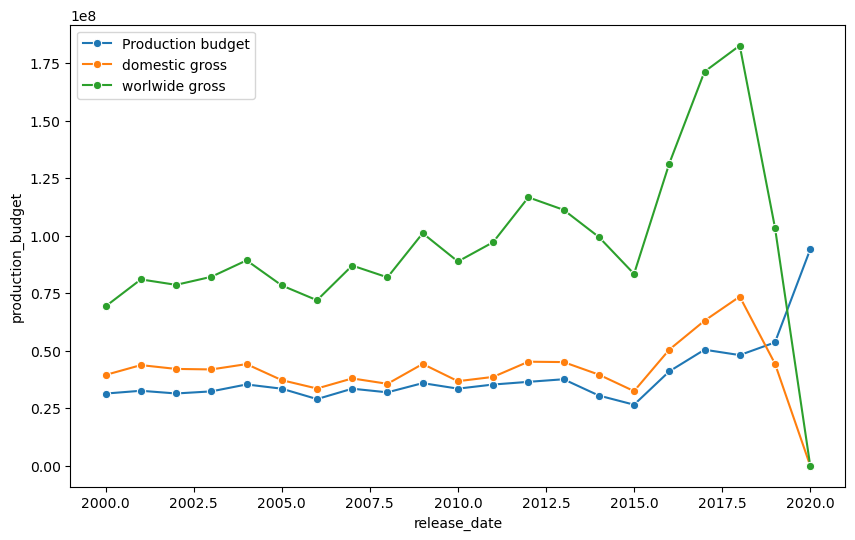

In [60]:
#set the fig size
plt.figure(figsize=(10,6))
#draw line graph
sns.lineplot(x='release_date', y='production_budget', data=year200_budget_grp, label='Production budget', marker ='o')
sns.lineplot(x='release_date', y='domestic_gross', data=year200_budget_grp, label='domestic gross',marker ='o')
sns.lineplot(x='release_date', y='worldwide_gross', data=year200_budget_grp, label='worlwide gross',marker ='o')
plt.legend();

##### Findings
- The success of the movie worldwide depends on the success of the movie domestically.
- The is slightly strong relation of the production budget and the domestic and worldwide gross.
- The production cost had a slight increase in value since 2000 then 2017 there was a sharp increase. Each year the production budget increases.
- The higher the production cost the higher the production and worlwide gross.

## c. Determine the best perfoming studio in terms of domestic and foreign gross
Collaboration with other organisation who have been in the field and have perfomed well overtime will be one of the best ways to ensure success of the business. 

Will use BM-Gross dataset and find the best perfoming studio in terms of domestic and gross.

In [61]:
#Upload the data
studio = pd.read_csv('data/bom.movie_gross.csv')
studio

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,"415,000,000.00",652000000,2010
1,Alice in Wonderland (2010),BV,"334,200,000.00",691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000.00",664300000,2010
3,Inception,WB,"292,600,000.00",535700000,2010
4,Shrek Forever After,P/DW,"238,700,000.00",513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,"6,200.00",NaN,2018
3383,Edward II (2018 re-release),FM,"4,800.00",NaN,2018
3384,El Pacto,Sony,"2,500.00",NaN,2018
3385,The Swan,Synergetic,"2,400.00",NaN,2018


In [62]:
studio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [63]:
studio.isna().mean()*100

title             0.00
studio            0.15
domestic_gross    0.83
foreign_gross    39.86
year              0.00
dtype: float64

In [64]:
#drop the foreign gross, movie,year column and any mising rows in the dataset
#drop the foreign gross
dom_studio = studio.drop(columns=['foreign_gross', 'title'])

In [65]:
dom_studio.isna().sum()

studio             5
domestic_gross    28
year               0
dtype: int64

In [66]:
dom_studio.dropna(inplace=True)

In [67]:
dom_studio.isna().sum()

studio            0
domestic_gross    0
year              0
dtype: int64

In [68]:
dom_studio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3356 entries, 0 to 3386
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3356 non-null   object 
 1   domestic_gross  3356 non-null   float64
 2   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 104.9+ KB


In [69]:
dom_studio.head(10)

,studio,domestic_gross,year
0,BV,"415,000,000.00",2010
1,BV,"334,200,000.00",2010
2,WB,"296,000,000.00",2010
3,WB,"292,600,000.00",2010
4,P/DW,"238,700,000.00",2010
5,Sum.,"300,500,000.00",2010
6,Par.,"312,400,000.00",2010
7,BV,"200,800,000.00",2010
8,Uni.,"251,500,000.00",2010
9,P/DW,"217,600,000.00",2010


In [70]:
dom_studio_grp = dom_studio.groupby(['studio','year']).mean()
dom_studio_grp

domestic_gross
studio year                
3D     2010    6,100,000.00
A23    2011      151,000.00
       2013       13,200.00
A24    2013    5,569,080.00
       2014    1,898,830.00
...                     ...
Zeit.  2013      392,500.00
       2014      126,175.00
       2015       22,900.00
       2016       11,700.00
       2017      820,000.00

[737 rows x 1 columns]

In [71]:
#Reset the index
dom_studio_grp.reset_index(inplace=True)

In [72]:
dom_studio_grp_filter = dom_studio_grp[dom_studio_grp['domestic_gross']>100000000]
dom_studio_grp_filter

,studio,year,domestic_gross
71,BV,2010,"108,509,228.57"
73,BV,2012,"121,223,076.92"
74,BV,2013,"181,640,000.00"
75,BV,2014,"116,892,307.69"
76,BV,2015,"226,881,818.09"
77,BV,2016,"220,846,153.85"
78,BV,2017,"297,275,000.00"
79,BV,2018,"304,560,000.00"
256,Fox,2014,"106,729,411.76"
467,P/DW,2010,"169,425,000.00"


In [73]:
#Find the best studio with high mean gross for each year
best_studio = dom_studio_grp_filter.loc[dom_studio_grp_filter.groupby('year')['domestic_gross'].idxmax()]
best_studio

,studio,year,domestic_gross
467,P/DW,2010,"169,425,000.00"
468,P/DW,2011,"222,300,000.00"
692,WB (NL),2012,"148,466,666.67"
74,BV,2013,"181,640,000.00"
75,BV,2014,"116,892,307.69"
76,BV,2015,"226,881,818.09"
77,BV,2016,"220,846,153.85"
78,BV,2017,"297,275,000.00"
79,BV,2018,"304,560,000.00"


#### Visualize


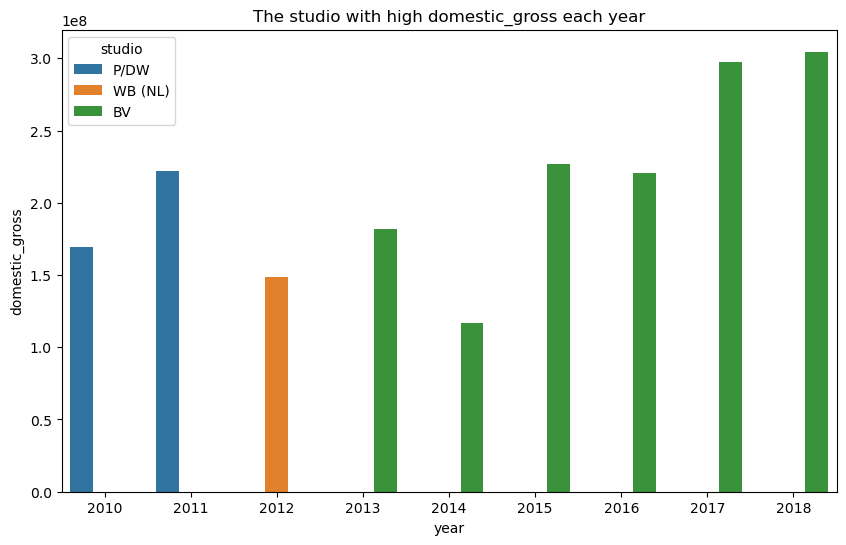

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='domestic_gross', hue='studio', data=best_studio)
plt.title('The studio with high domestic_gross each year');

#### Findings
- BV is the best movie to work with. 
It has shown a contionus increment of the domestic gross since 2015

## d. Determine Age rating of film and its value in Box office
The movie information dataser from the rotten tomato website includes the age rating with:
- **G** - Suitable for all ages to watch
- **PG** - Needs parental guidance
- **PG13** - Parental guidance for only 13+ to watch
- **R** - Not allowed for those under age of 17
- **NC17** - Only for 18+, strictly for 18+
- **NR** - not submitted for rating


In [75]:
box_info = pd.read_table('data/rt.movie_info.tsv')
box_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [76]:
box_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [77]:
box_info.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [78]:
box_fill = box_info.drop(columns=['synopsis', 'genre', 'director', 'writer',
                       'dvd_date', 'currency', 'runtime', 'studio','id'])

In [79]:
box_fill

,rating,theater_date,box_office
0,R,"Oct 9, 1971",NaN
1,R,"Aug 17, 2012","600,000"
2,R,"Sep 13, 1996",NaN
3,R,"Dec 9, 1994",NaN
4,NR,NaN,NaN
...,...,...,...
1555,R,"Aug 18, 2006","33,886,034"
1556,PG,"Jul 23, 1993",NaN
1557,G,"Jan 1, 1962",NaN
1558,PG,"Apr 1, 1993",NaN


In [80]:
#Convert date from an object to date format
box_fill['theater_date'] = pd.to_datetime(box_fill['theater_date'])

In [81]:
#Will use data of the latest dates after 2009
box_fill = box_fill[box_fill['theater_date'].dt.year > 2009]

In [82]:
box_fill.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 1 to 1542
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   rating        204 non-null    object        
 1   theater_date  204 non-null    datetime64[ns]
 2   box_office    138 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 6.4+ KB


In [83]:
box_fill.head()

,rating,theater_date,box_office
1,R,2012-08-17,"600,000"
8,R,2010-06-30,"134,904"
15,R,2010-12-17,"1,039,869"
16,R,2013-12-20,"99,165,609"
18,PG-13,2013-12-25,"20,518,224"


In [84]:
#drop the the null rows in the box_office and the theater date
box_fillna = box_fill.dropna(subset=['box_office','theater_date'])

In [85]:
box_fillna.isna().sum()

rating          0
theater_date    0
box_office      0
dtype: int64

In [86]:
box_fillna

,rating,theater_date,box_office
1,R,2012-08-17,"600,000"
8,R,2010-06-30,"134,904"
15,R,2010-12-17,"1,039,869"
16,R,2013-12-20,"99,165,609"
18,PG-13,2013-12-25,"20,518,224"
...,...,...,...
1518,R,2010-06-11,"2,927,972"
1530,PG,2011-12-23,"72,700,000"
1536,NR,2013-07-03,"581,813"
1537,NR,2016-02-17,"1,320,005"


In [87]:
#Removing the commas from the box_office column
#.loc ensures the chages are made in the original dataframe
box_fillna.loc[:,'box_office'] = box_fillna['box_office'].str.replace(',','').astype(int)

In [88]:
box_fillna

,rating,theater_date,box_office
1,R,2012-08-17,600000
8,R,2010-06-30,134904
15,R,2010-12-17,1039869
16,R,2013-12-20,99165609
18,PG-13,2013-12-25,20518224
...,...,...,...
1518,R,2010-06-11,2927972
1530,PG,2011-12-23,72700000
1536,NR,2013-07-03,581813
1537,NR,2016-02-17,1320005


In [89]:
#Access the year alone in the theater date column
box_fillna.loc[:,'theater_date'] = box_fillna['theater_date'].dt.year

In [90]:
box_fillna.head()

,rating,theater_date,box_office
1,R,2012,600000
8,R,2010,134904
15,R,2010,1039869
16,R,2013,99165609
18,PG-13,2013,20518224


In [91]:
box_fillna['theater_date'].value_counts()

theater_date
2010    25
2013    21
2012    19
2011    19
2016    17
2015    13
2014    11
2017    11
2018     2
Name: count, dtype: int64

In [92]:
box_fillna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 1 to 1542
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rating        138 non-null    object
 1   theater_date  138 non-null    int32 
 2   box_office    138 non-null    object
dtypes: int32(1), object(2)
memory usage: 3.8+ KB


In [93]:
box_fillna

,rating,theater_date,box_office
1,R,2012,600000
8,R,2010,134904
15,R,2010,1039869
16,R,2013,99165609
18,PG-13,2013,20518224
...,...,...,...
1518,R,2010,2927972
1530,PG,2011,72700000
1536,NR,2013,581813
1537,NR,2016,1320005


In [94]:
#Find the frequency of rating
box_fillna['rating'].value_counts()

rating
R        66
PG-13    41
PG       18
NR       12
G         1
Name: count, dtype: int64

In [95]:
#Group the data with rating and year, then find the mean of box office for each rating per the year
box_fillna_grp = box_fillna.groupby(['rating', 'theater_date']).mean()
box_fillna_grp

box_office
rating theater_date               
G      2010          19,000,000.00
NR     2010             463,914.00
       2011               8,856.00
       2012             667,133.67
       2013             657,697.75
       2016             806,464.00
       2018           1,526,248.00
PG     2010          29,605,716.80
       2011          72,422,515.67
       2012          41,800,000.00
       2013           3,551,741.50
       2014         190,871,149.00
       2015          66,580,191.00
       2016          53,986,881.00
       2017           5,046,832.00
PG-13  2010          32,123,107.14
       2011          52,896,341.44
       2012         136,431,193.60
       2013          11,235,644.00
       2014          14,158,920.00
       2015          23,820,773.40
       2016           6,427,293.50
       2017          33,468,167.00
       2018          35,003,216.00
R      2010          11,319,988.36
       2011          26,538,761.33
       2012          14,751,780.30
       2013          26,169,268.83
       2014          13,238,987.00
       2015          15,224,882.86
       2016          17,949,941.55
       2017          45,867,255.25

In [96]:
#Reset the index to be able to get the visualization of rating and the year
box_fillna_grp.reset_index(inplace=True)

In [97]:
box_fillna_grp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rating        32 non-null     object
 1   theater_date  32 non-null     int32 
 2   box_office    32 non-null     object
dtypes: int32(1), object(2)
memory usage: 768.0+ bytes


In [98]:
#convert the box_office to a float
box_fillna_grp['box_office'] = box_fillna_grp['box_office'].astype(float)

In [99]:
#normalize the box office using the logarithimic scaling
#Logarithmic scaling because of the wide range of the box plot value
box_fillna_grp['box_office'] = np.log10(box_fillna_grp['box_office'])

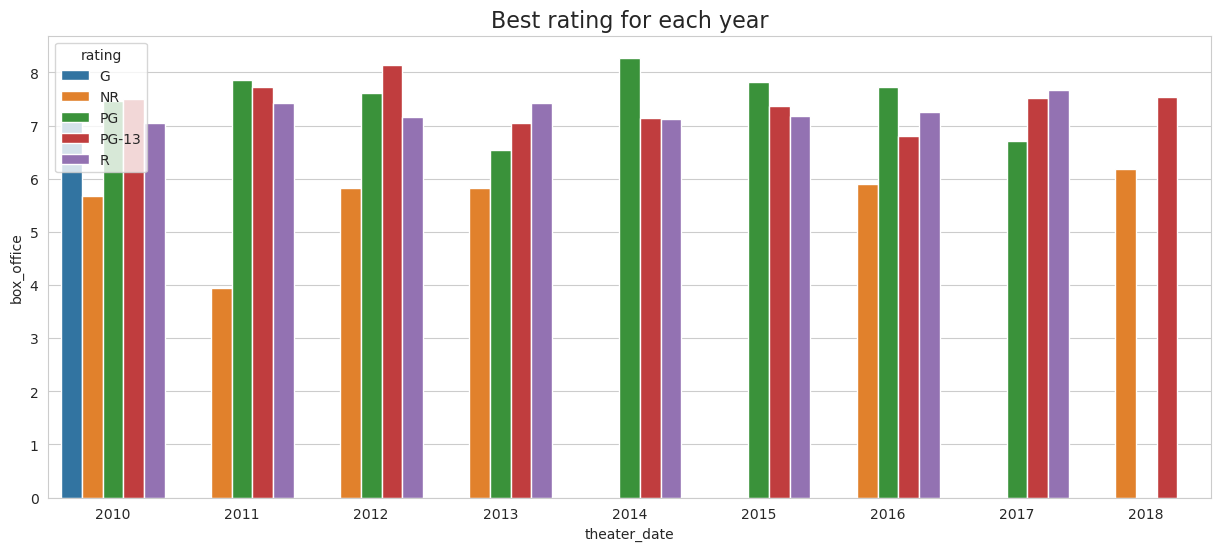

In [100]:
#Draw a bar graph using sns
plt.figure(figsize=(15, 6))
sns.set_style('whitegrid')

sns.barplot(x='theater_date', y='box_office', hue='rating', data=box_fillna_grp)
plt.title("Best rating for each year", fontsize=16);

#### Findings
1. Since 2010 the **R** movies are the higest in production.
2. The **PG & PG-13** has shown consistency in high production in box office.

## 4. Conclusions

- Film with Action, Adventure and fantacy genre are most watched, with an average runtime of 116minutes.
- Worldwide/international success of movies is affected by the success of the movie domestically.
- There is an increase in the production budget since 2017 and the same reflects in the domestic and international gross.
- BV studio had the highest gross.
- Movies rated PG and PG-13, have high gross.

## 5. Recommendations

- The new studio should consider making movies with the *Action, Adventure and fantancy genre.*
- In any film production they should lay strategies to ensure *success of the movie domestically.* 
- They should consider *partnering with BV studio.*
- The movie should have *content rated PG-13 or PG.*